In [1]:
!ls ../data/'Data DigitalFreud'/final_data/1

item1.csv    item1.csv.gz


In [2]:
import os
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [3]:
base_path = "../data/Data DigitalFreud/final_data/"
base_info_path = '1/item1.csv'

base_info_file = os.path.join(base_path, base_info_path)
base_info = pd.read_csv(base_info_file)

In [4]:
base_info

,userid_encrypted,vk_id_encrypted,who_1,who_2,who_3,who_4,who_5,who_score,diener_1,diener_2,diener_3,diener_4,diener_5,diener_score,sex,birthyear,education,employment,marital_status,freud_install_time
0,fa375bc4-a5ce-23df-7400-5c51954d4886,745443180,4.0,3.0,3.0,4.0,3.0,13.0,3.0,5.0,5.0,3.0,6.0,13.0,male,1984.0,"Среднее, сейчас не учусь",NaN,NaN,2018-06-12 06:40:08
1,fa09a81a-bc78-2f64-704b-8e0fb2cf5242,677093196,2.0,3.0,1.0,5.0,3.0,16.0,6.0,2.0,1.0,2.0,5.0,19.0,female,1996.0,"Неоконченное высшее, учусь",NaN,NaN,2018-06-26 13:01:22
2,fa745c06-e879-205a-5780-445bebd6ca3d,188075273,4.0,4.0,4.0,3.0,1.0,14.0,2.0,2.0,1.0,1.0,4.0,25.0,female,1995.0,"Бакалавр, сейчас не учусь",NaN,NaN,2018-07-08 08:33:11
3,fa5a0f03-8888-2d6f-7381-5300d0f370f6,95556615,3.0,3.0,3.0,3.0,3.0,15.0,5.0,5.0,5.0,5.0,5.0,10.0,male,2000.0,secondary,student,in_relationship,2018-09-13 07:45:18
4,fa52b45a-507a-20e3-6c4e-c158b74f4347,435358060,3.0,3.0,5.0,4.0,3.0,12.0,5.0,1.0,3.0,3.0,1.0,22.0,female,1999.0,"Неоконченное высшее, учусь",NaN,NaN,2018-06-28 18:57:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,05bb8881-3a62-2bf2-709e-9217d7abc16e,849073825,3.0,2.0,3.0,3.0,4.0,15.0,3.0,2.0,2.0,3.0,4.0,21.0,NaN,NaN,NaN,NaN,NaN,2018-03-27 08:28:00
2037,0588a82f-7b0c-29d7-52a6-63e0623023d4,152356414,2.0,2.0,2.0,2.0,3.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,female,1993.0,secondary_special,freelancer,married,2019-06-04 14:02:24
2038,05ec148b-67f3-2b4d-71c9-53bee209805e,694243187,4.0,4.0,4.0,4.0,4.0,10.0,5.0,2.0,2.0,5.0,5.0,16.0,female,1995.0,secondary_special,unemployed,in_relationship,2019-09-05 05:32:31
2039,05e570f2-e074-219e-42da-d5117d5b13c3,418940323,2.0,0.0,1.0,4.0,4.0,19.0,5.0,4.0,5.0,5.0,5.0,11.0,female,2000.0,other,unemployed,single,2019-03-27 11:48:09


In [5]:
target_col_name = "who_score"

In [6]:
# filter no who score users
no_who_score = base_info[base_info[target_col_name].notna()]

In [7]:
no_who_score.shape

(1783, 20)

In [8]:
print(no_who_score[target_col_name].unique())

[13. 16. 14. 15. 12. 23. 30. 10. 17. 18. 21. 22. 19. 20. 24. 25.  7. 11.
  9.  5.  8. 26. 28. 27.  6. 29.]


In [9]:
def plot_column_dist(table, col_name):
    table[col_name].plot.hist()
    plt.title(f"Distribution of column '{col_name}'")
    plt.show()

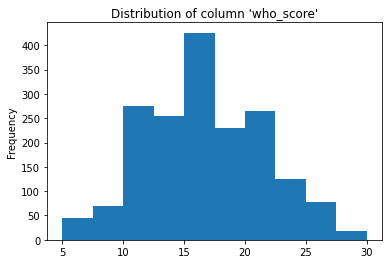

In [10]:
plot_column_dist(no_who_score, target_col_name)

In [11]:
# filter not na who score and not na sex and not na birthyear users
filtred_users = \
    base_info[(base_info[target_col_name].notna()) 
              & (base_info.sex.notna()) 
              & (base_info.birthyear.notna())]

In [12]:
filtred_users.shape

(1436, 20)

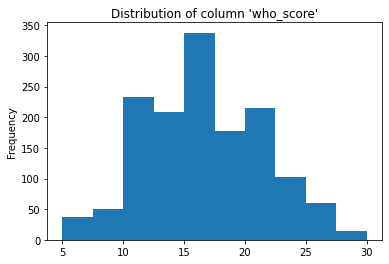

In [13]:
plot_column_dist(filtred_users, target_col_name)

In [14]:
stats.pearsonr(filtred_users.birthyear, filtred_users[target_col_name])


(-0.07401728637988333, 0.005011989264312792)

In [15]:
def get_install_app_year(x):
    return float(parse(x).year)

In [16]:
install_year_name = "install_year"
filtred_users[install_year_name] = filtred_users.freud_install_time.apply(get_install_app_year)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


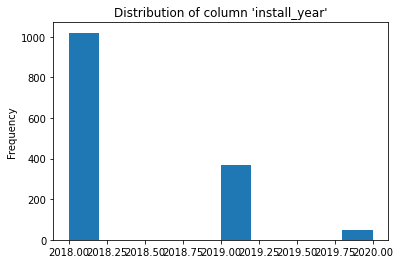

In [17]:
plot_column_dist(filtred_users, install_year_name)

In [18]:
age_name = "age"
filtred_users[age_name] = filtred_users[install_year_name] - filtred_users.birthyear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


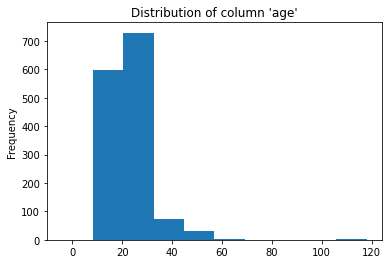

In [19]:
plot_column_dist(filtred_users, age_name)

In [20]:
filtred_users_by_age = filtred_users[(filtred_users.age < 100) & (filtred_users.age > 10)]

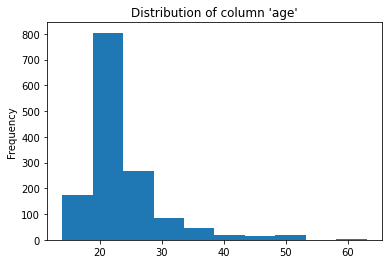

In [21]:
plot_column_dist(filtred_users_by_age, age_name)

(0.10072805270887714, 0.00013447581750021127)

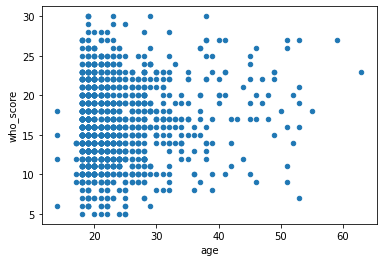

In [22]:
filtred_users_by_age[[age_name, target_col_name]].plot.scatter(age_name, target_col_name)
stats.pearsonr(filtred_users_by_age[age_name], filtred_users_by_age[target_col_name])

(-0.02592074915822867, 0.6435977299877476)

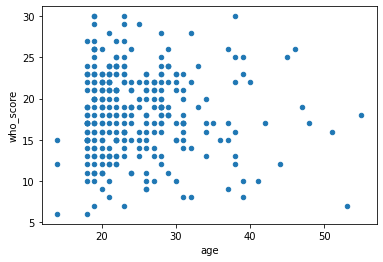

In [23]:
# only Male
filtred_users_by_age_male = filtred_users_by_age[filtred_users_by_age.sex == "male"]
filtred_users_by_age_male[[age_name, target_col_name]].plot.scatter(age_name, target_col_name)
stats.pearsonr(filtred_users_by_age_male[age_name], filtred_users_by_age_male[target_col_name])

(0.11673360695753356, 9.62381722587035e-05)

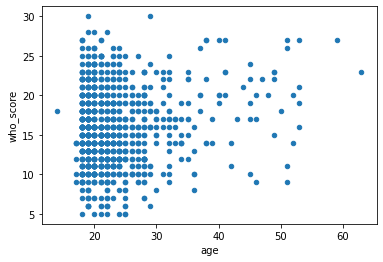

In [24]:
# only Female
filtred_users_by_age_female = filtred_users_by_age[filtred_users_by_age.sex != "male"]
filtred_users_by_age_female[[age_name, target_col_name]].plot.scatter(age_name, target_col_name)
stats.pearsonr(filtred_users_by_age_female[age_name], filtred_users_by_age_female[target_col_name])

In [33]:
bin_sex_name = "bin_sex"
filtred_users_by_age[bin_sex_name] = np.where(filtred_users_by_age.sex == "male", 1, 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    filtred_users_by_age[[bin_sex_name, age_name]],
    filtred_users_by_age[target_col_name], 
    test_size=0.33,
    random_state=42
)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.024209063739050296

In [39]:
predicted_y = lr.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predicted_y, y_test)

24.521461494905544

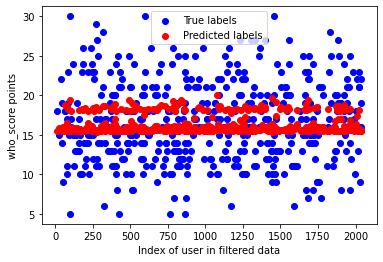

In [54]:
plt.scatter(y_test.index.tolist(), y_test, color = "blue")
plt.scatter(y_test.index.tolist(), predicted_y, color = "red")
plt.xlabel("Index of user in filtered data")
plt.ylabel(f"{target_col_name} points")
plt.legend(("True labels", "Predicted labels"))
plt.show()

## Additional

In [25]:
# filter no diener score users
no_diener_score = base_info[base_info.diener_score.notna()]

In [26]:
no_diener_score.shape

(1718, 20)

In [27]:
print(no_diener_score.diener_score.unique())

[13. 19. 25. 10. 22. 16. 24. 27. 23.  9. 15. 33. 26. 14. 28. 29. 31. 12.
 18. 20.  7.  6. 17. 21.  8. 11. 32. 30.  5. 34. 35.]


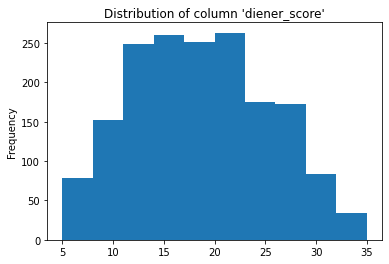

In [28]:
plot_column_dist(no_diener_score, "diener_score")
